In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 미로 구현
초기상태

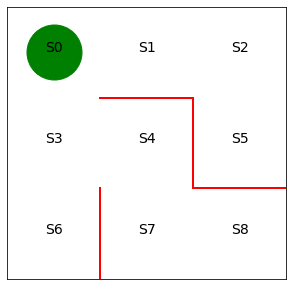

In [11]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

#붉은 벽 그리기
plt.plot([1,1],[0,1], color='red', linewidth=2)
plt.plot([1,2],[2,2], color='red', linewidth=2)
plt.plot([2,2],[2,1], color='red', linewidth=2)
plt.plot([2,3],[1,1], color='red', linewidth=2)

#상태 문자열 표시
plt.text(0.5, 2.5, 'S0', size=14, ha = 'center')
plt.text(1.5, 2.5, 'S1', size=14, ha = 'center')
plt.text(2.5, 2.5, 'S2', size=14, ha = 'center')
plt.text(0.5, 1.5, 'S3', size=14, ha = 'center')
plt.text(1.5, 1.5, 'S4', size=14, ha = 'center')
plt.text(2.5, 1.5, 'S5', size=14, ha = 'center')
plt.text(0.5, 0.5, 'S6', size=14, ha = 'center')
plt.text(1.5, 0.5, 'S7', size=14, ha = 'center')
plt.text(2.5, 0.5, 'S8', size=14, ha = 'center')

# x,y축 범위 설정 및 눈금 제거
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both',bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

#시작점 표시
line, = ax.plot([0.5],[2.5], marker='o', color='g', markersize=55)

### 에이전트 구현

In [12]:
#정책을 결정하는 파라미터의 초깃값 theta_0을 설정
#row - 상태0~7, col - 행동(상,우,하,좌)

theta_0 = np.array([[np.nan, 1, 1, np.nan], #S0일 때 가능한 행동이면 1, 가능하지 않은 방향이면 nan
                     [np.nan, 1, np.nan, 1], #S1
                     [np.nan, np.nan, 1, 1], #S2
                     [1, 1, 1 , np.nan], #S3
                     [np.nan, np.nan, 1, 1], #4
                     [1, np.nan, np.nan, np.nan], #S5
                     [1, np.nan, np.nan, np.nan], #S6
                     [1, 1, np.nan, np.nan] #S7
                    ]) #S8은 목표지점이기 때문에 정책 없음

In [13]:
#정책 파라미터 theta를 행동 정책 pi로 변환하는 함수

def simple_convert_into_pi_from_theta(theta):
    #단순히 값의 비율을 계산해 확률로 삼는 예시
    [m,n] = theta.shape #theta의 행렬 크기를 구함
    pi = np.zeros((m,n))
    for i in range(0,m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i,:]) #비율계산
    pi = np.nan_to_num(pi) #nan을 0으로 변환
    
    return pi

In [14]:
#초기 정책 pi_0을 계산
pi_0 = simple_convert_into_pi_from_theta(theta_0)

print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [15]:
#한 단계 이동 후의 상태 s_next를 계산하는 함수

def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s, :]) #pi [s,:]의 값에 따라 direction 값이 결정됨
    
    if next_direction == 'up':      s_next = s - 3
    elif next_direction == 'right': s_next = s + 1
    elif next_direction == 'down':  s_next = s + 3
    elif next_direction == 'left':  s_next = s - 1
    #next_direction에 따라 현재 상태가 변함
    
    return s_next

In [16]:
#목표 지점에 이를 때까지 에이전트를 이동시키는 함수

def goal_maze(pi):
    s = 0 #시작 지점
    state_history = [0]
    
    while(1):
        next_s = get_next_s(pi,s)
        state_history.append(next_s)
        
        if next_s == 8: break #목표지점에 이르면 while문 중단
        else: s = next_s #아직 도달 안했으면 s 업데이트
        
    return state_history

In [17]:
#실제로 경로 이동 히스토리 저장해보기
state_history = goal_maze(pi_0)

In [18]:
#결과 출력하기
print('목표 지점에까지 걸린 단계의 수는 '+str(len(state_history)-1)+'단계 입니다.')
print(state_history)

목표 지점에까지 걸린 단계의 수는 20단계 입니다.
[0, 3, 6, 3, 6, 3, 6, 3, 0, 3, 0, 1, 0, 1, 0, 3, 6, 3, 4, 7, 8]
